In [ ]:
from google.colab import drive
drive.mount("/content/Sales_predictions")

Mounted at /content/Sales_predictions


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,mean_absolute_error

In [ ]:
sales_data=pd.read_csv("/content/Sales_predictions/MyDrive/Share advertising1.csv")
(sales_data)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


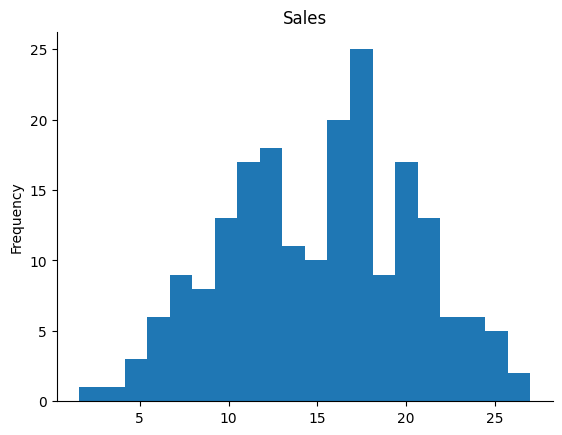

In [ ]:
from matplotlib import pyplot as plt
sales_data['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

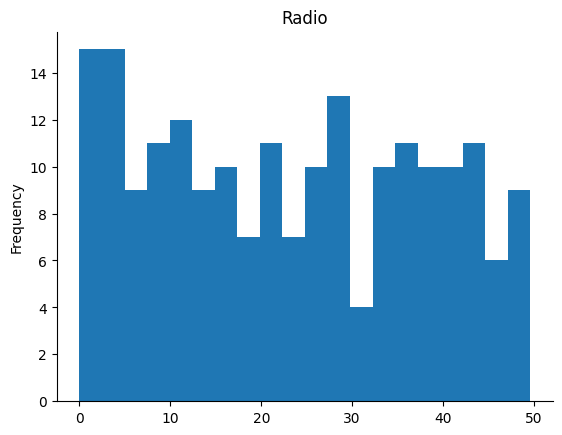

In [ ]:
from matplotlib import pyplot as plt
sales_data['Radio'].plot(kind='hist', bins=20, title='Radio')
plt.gca().spines[['top', 'right',]].set_visible(False)

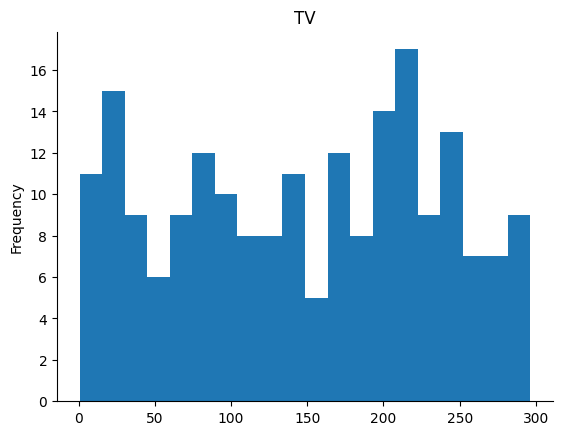

In [ ]:
from matplotlib import pyplot as plt
sales_data['TV'].plot(kind='hist', bins=20, title='TV')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='Newspaper', ylabel='Sales'>

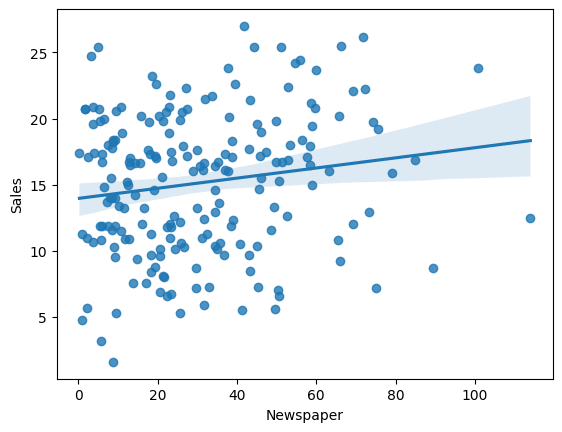

In [ ]:
sns.regplot(data=sales_data,x="Newspaper",y="Sales")

<Axes: xlabel='Radio', ylabel='Sales'>

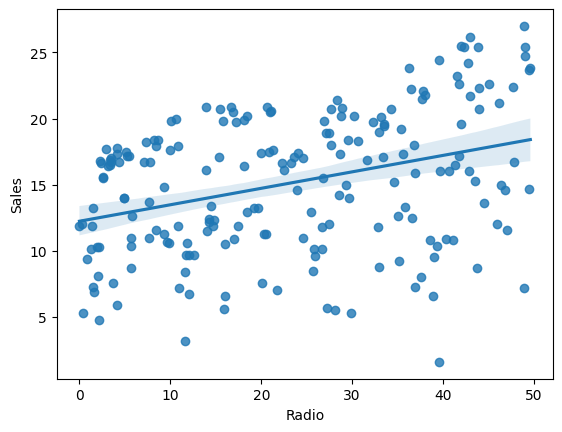

In [ ]:
sns.regplot(data=sales_data,x="Radio",y="Sales")

<Axes: xlabel='TV', ylabel='Sales'>

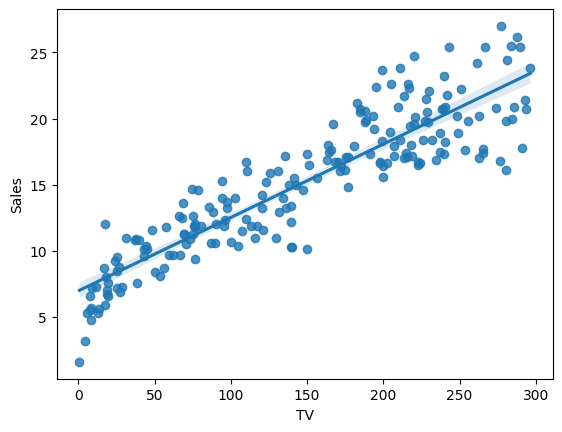

In [ ]:
sns.regplot(data=sales_data,x="TV",y="Sales")

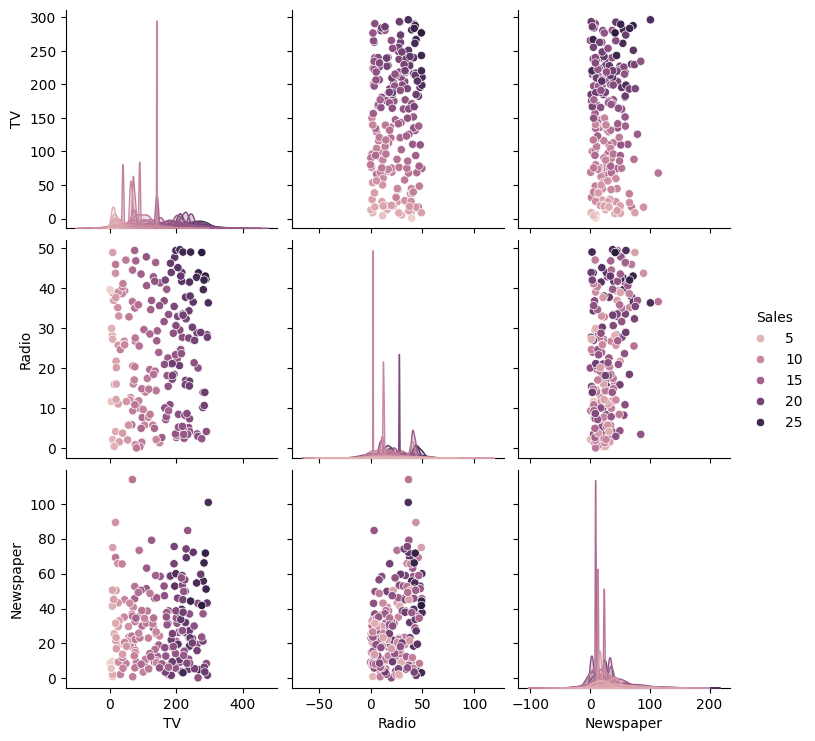

In [ ]:
sns.pairplot(data=sales_data,hue="Sales")

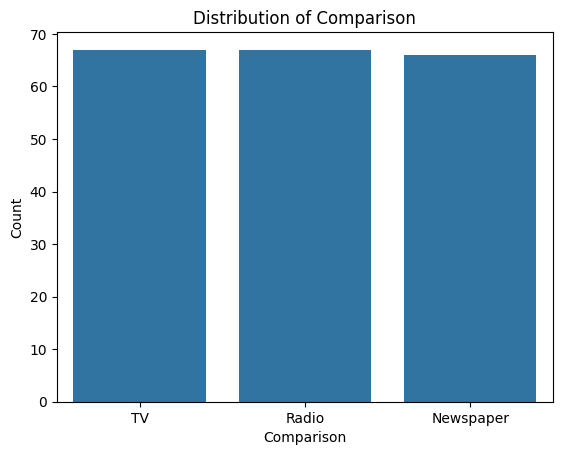

In [ ]:
# Ensure the length of the values matches the length of the DataFrame index
comparison_values = ["TV", "Radio", "Newspaper"]
num_repeats = len(sales_data) // len(comparison_values)
remainder = len(sales_data) % len(comparison_values)
sales_data["comparison"] = comparison_values * num_repeats + comparison_values[:remainder]

# Visualize the distribution of the 'comparison' column using a countplot
sns.countplot(data=sales_data, x="comparison")
plt.title("Distribution of Comparison")
plt.xlabel("Comparison")
plt.ylabel("Count")
plt.show()

In [ ]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TV          200 non-null    float64
 1   Radio       200 non-null    float64
 2   Newspaper   200 non-null    float64
 3   Sales       200 non-null    float64
 4   comparison  200 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
sales_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
# Checking for missing values in the sales_data DataFrame
missing_values = sales_data.isnull().sum()

# Displaying the count of missing values for each column
print(missing_values)

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [ ]:
# Data preprocessing
# Drop any rows with missing values
sales_data.dropna(inplace=True)

In [ ]:
X=sales_data.drop(["Sales"],axis=1)
y=sales_data["Sales"]

In [ ]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


<Axes: >

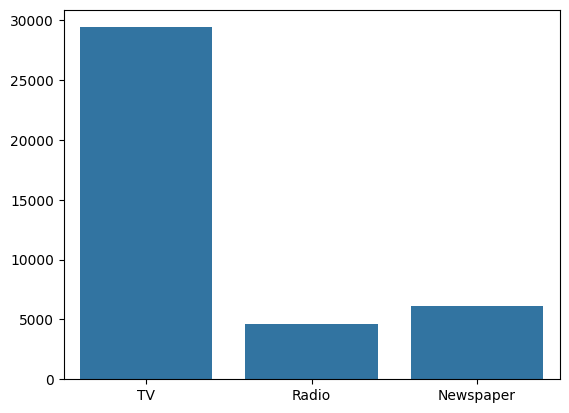

In [ ]:
sns.barplot(data=X.sum())

In [ ]:
print("\tsale's")
y

	sale's


0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [ ]:

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, train_size=0.8, random_state=300)

# Fit the SVR model
model = SVR()
model.fit(x_train, y_train)

# Evaluate the model
mae = mean_absolute_error(y_test, model.predict(x_test))
print("Mean Absolute Error:", mae)

# Predict on a single sample
# Assuming the single sample is standardized in the same way
sample_data = [[17.2, 45.9, 69.3]]  # Example data
sample_data_scaled = scaler.transform(sample_data)
preds = model.predict(sample_data_scaled)
print("Predictions:", preds)

Mean Absolute Error: 1.2196550605504695
Predictions: [11.90001798]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
